In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Desktop/titanic_dataset/train.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 12)

In [5]:
#checking categorical data

In [6]:
pd.unique(dataset['Survived'])

array([0, 1], dtype=int64)

In [7]:
pd.unique(dataset['Pclass'])

array([3, 1, 2], dtype=int64)

In [8]:
pd.unique(dataset['Sex'])

array(['male', 'female'], dtype=object)

In [9]:
pd.unique(dataset['SibSp'])

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [10]:
pd.unique(dataset['Parch'])

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [11]:
pd.unique(dataset['Embarked'])

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


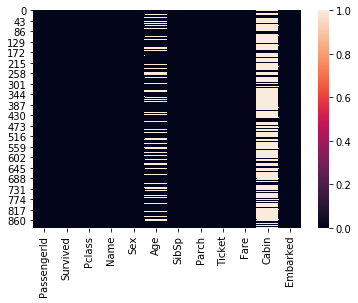

In [13]:
sb.heatmap(dataset.isnull())

In [14]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


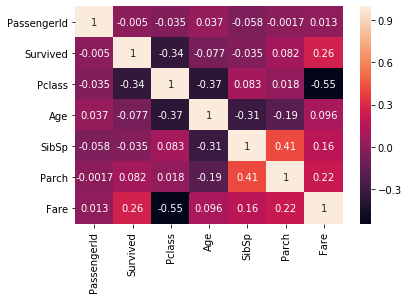

In [16]:
sb.heatmap(dataset.corr(),annot= True)

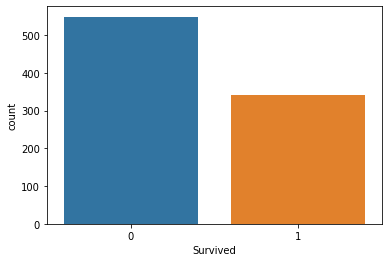

In [17]:
sb.countplot(x='Survived',data=dataset)

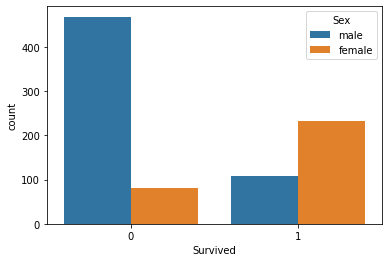

In [18]:
sb.countplot(x='Survived',hue='Sex',data=dataset)

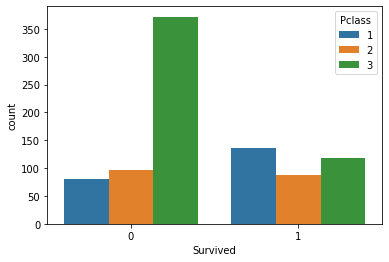

In [19]:
sb.countplot(x="Survived",hue="Pclass", data=dataset)

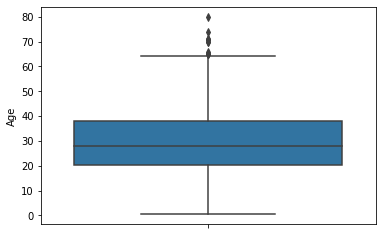

In [20]:
sb.boxplot(y = 'Age',data = dataset)

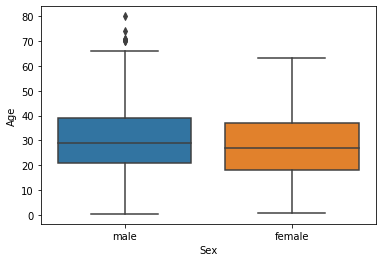

In [21]:
sb.boxplot(x='Sex',y='Age',data = dataset)

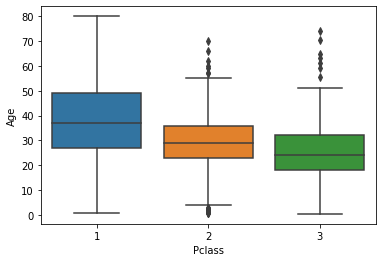

In [22]:
sb.boxplot(x= 'Pclass',y = 'Age', data=dataset)

In [23]:
dataset[['Pclass','Age']].groupby(['Pclass'], as_index = False).median()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [24]:
def imt_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 31
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [25]:
dataset["Age"] = dataset[['Age','Pclass']].apply(imt_age,axis=1)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


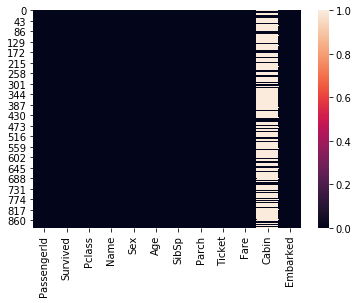

In [27]:
sb.heatmap(dataset.isnull())

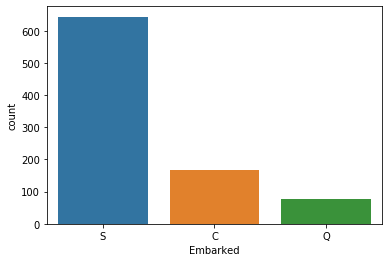

In [28]:
sb.countplot(x='Embarked', data = dataset)

In [29]:
dataset.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [30]:
common_value='S'
dataset['Embarked'] = dataset[['Embarked']].fillna(common_value)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [32]:
dataset.drop('Cabin',axis=1,inplace=True)

In [33]:
#catagorical encoding

In [34]:
sex = pd.get_dummies(dataset['Sex'],drop_first = True)
embarked = pd.get_dummies(dataset['Embarked'],drop_first = True)

In [35]:
dataset.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace = True)

In [36]:
dataset=pd.concat([dataset,sex,embarked],axis=1)

In [37]:
dataset.shape

(891, 9)

In [38]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [39]:
#Train test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1),
                                                   dataset['Survived'], test_size = 0.20, stratify=dataset["Survived"],
                                                   random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

C:\Users\Administrator\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
logmodel.score(X_train, y_train)

0.8103932584269663

In [44]:
logmodel.predict(X_test)[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [45]:
logmodel.predict_proba(X_test)[0:5]

array([[0.840714  , 0.159286  ],
       [0.61145662, 0.38854338],
       [0.45196289, 0.54803711],
       [0.88694794, 0.11305206],
       [0.8942805 , 0.1057195 ]])

In [46]:
y_prd = logmodel.predict(X_test)

In [64]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[94 16]
 [37 32]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       110
           1       0.67      0.46      0.55        69

    accuracy                           0.70       179
   macro avg       0.69      0.66      0.66       179
weighted avg       0.70      0.70      0.69       179



Survived
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

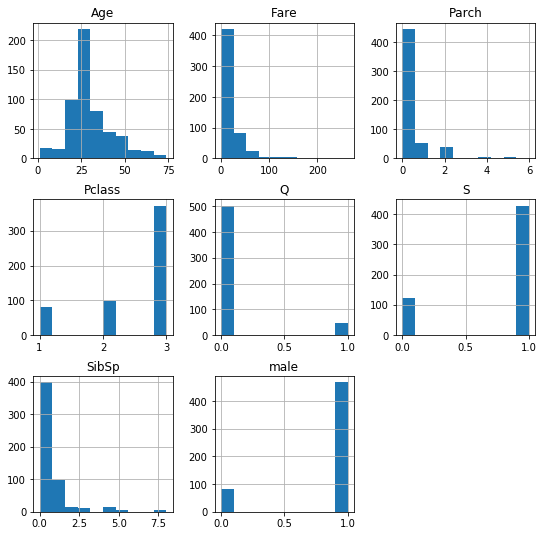

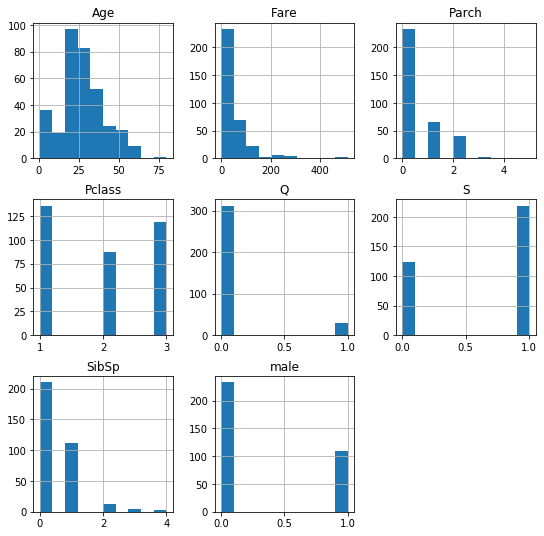

In [49]:
dataset.groupby('Survived').hist(figsize=(9,9))

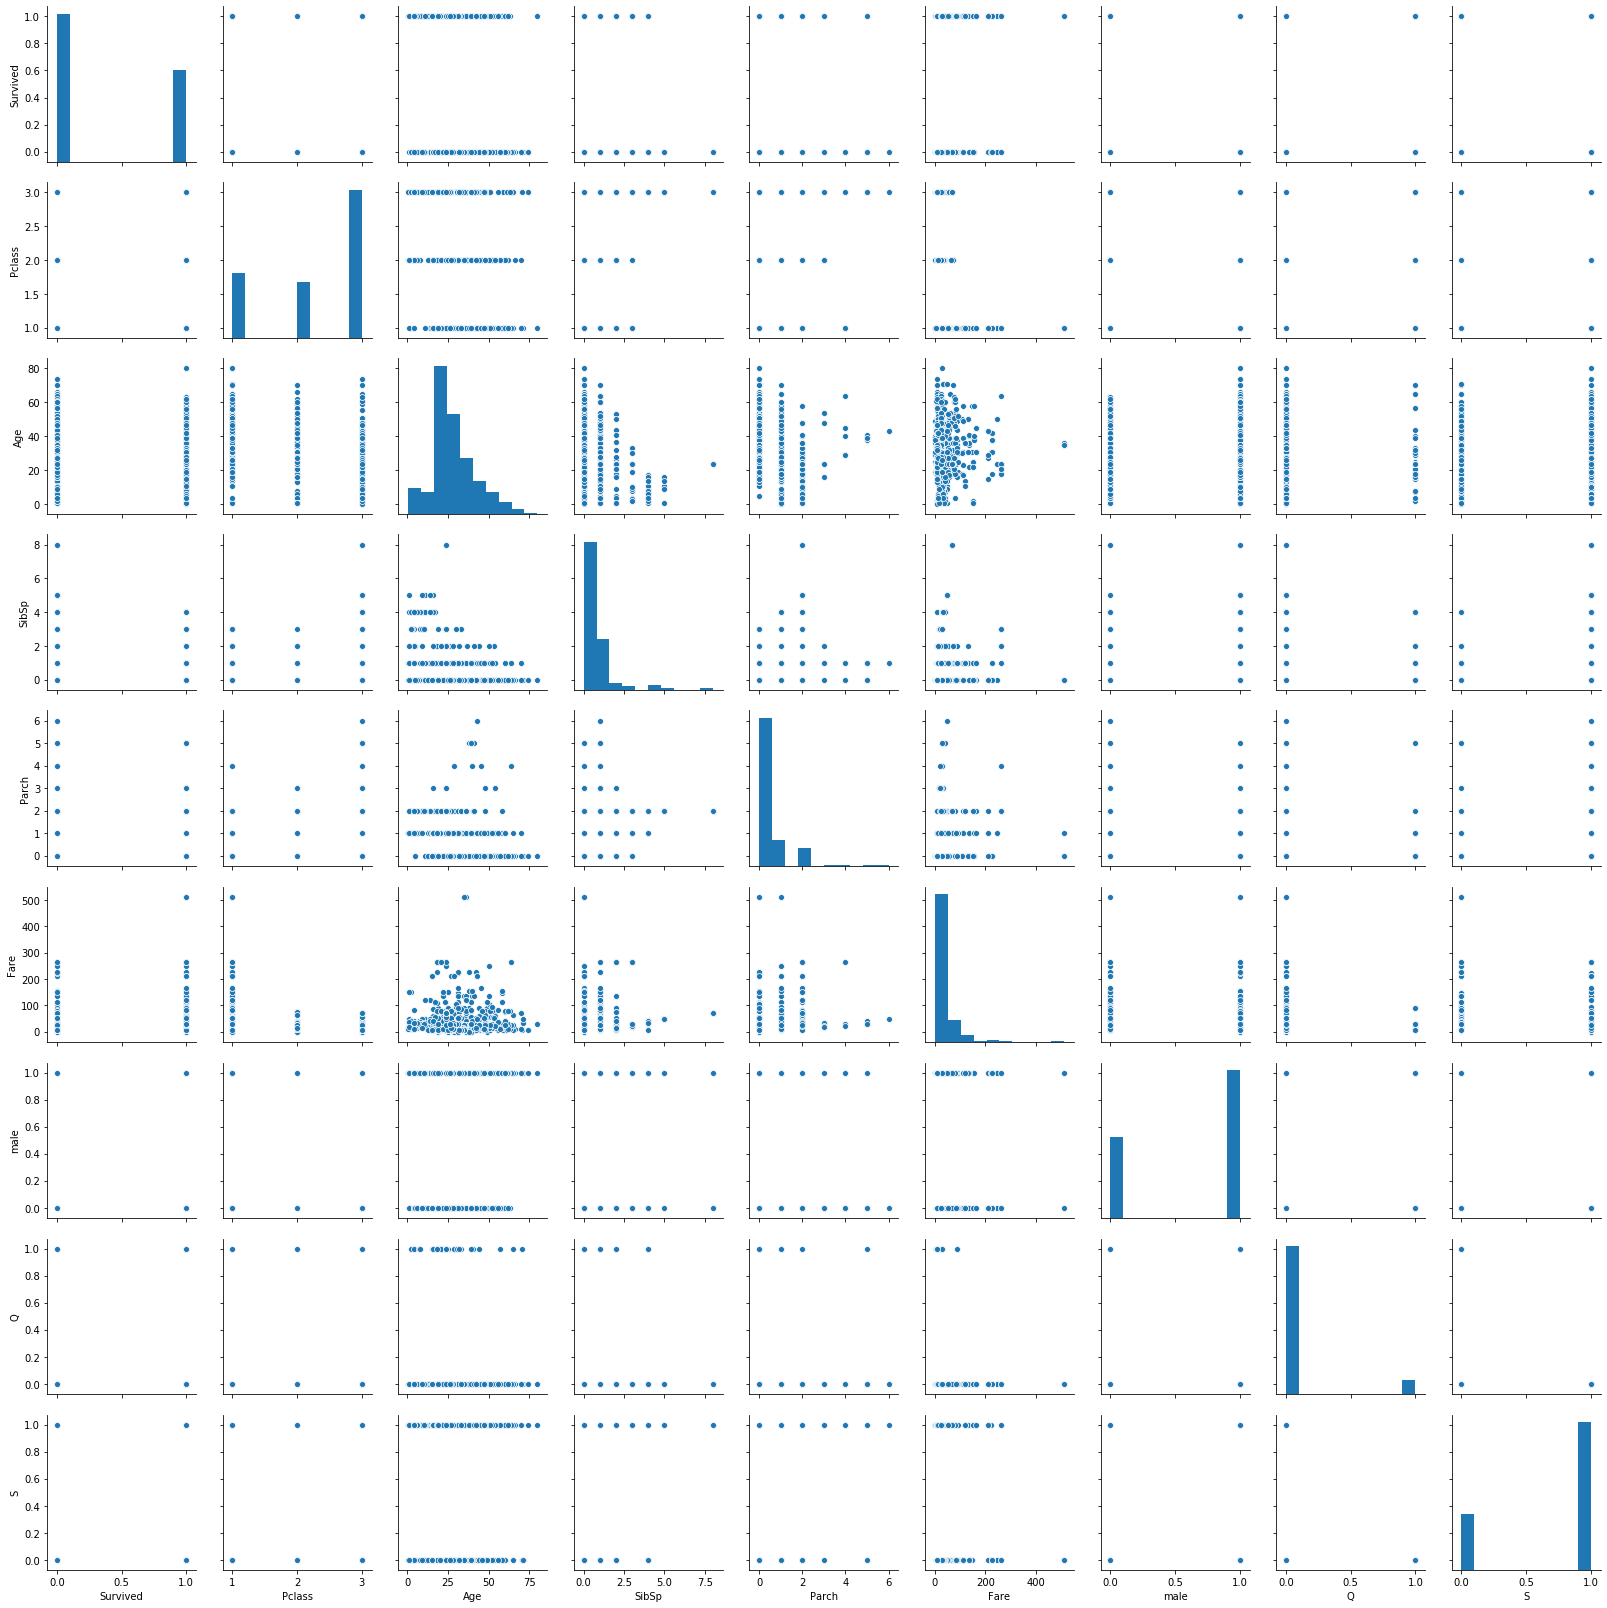

In [50]:
sb.pairplot(dataset)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
training_accuracy=[]
testing_accuracy=[]

neighbors_settings = range(1,11)
for i in neighbors_settings:
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train, y_train)
    training_accuracy.append(Knn.score(X_train,y_train))
    testing_accuracy.append(Knn.score(X_test,y_test))

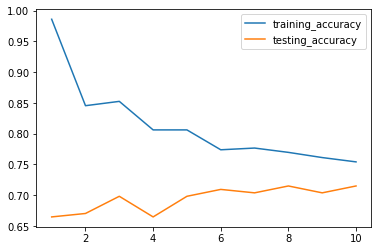

In [53]:
plt.plot(neighbors_settings,training_accuracy, label ="training_accuracy")
plt.plot(neighbors_settings,testing_accuracy, label = 'testing_accuracy')
plt.legend()

In [54]:
Knn = KNeighborsClassifier(n_neighbors=9)
Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [55]:
Knn.score(X_test, y_test)

0.7039106145251397

In [56]:
Knn.score(X_train,y_train)

0.7612359550561798

In [57]:
Knn.predict(X_test)[0:5]

array([1, 1, 1, 0, 0], dtype=int64)

In [58]:
Knn.predict_proba(X_test)[0:5]

array([[0.44444444, 0.55555556],
       [0.44444444, 0.55555556],
       [0.11111111, 0.88888889],
       [0.77777778, 0.22222222],
       [1.        , 0.        ]])

In [59]:
y_pred=Knn.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[94 16]
 [37 32]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       110
           1       0.67      0.46      0.55        69

    accuracy                           0.70       179
   macro avg       0.69      0.66      0.66       179
weighted avg       0.70      0.70      0.69       179



In [76]:
from sklearn.svm import SVC
clf = SVC(kernel = "linear" , probability=True)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [77]:
preds = clf.predict(X_test)

In [78]:
clf.score(X_train,y_train)

0.797752808988764

In [79]:
clf.score(X_test,y_test)

0.7430167597765364